In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('AirQualityUCI.xlsx')

In [5]:
# Display basic info and first few rows
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [7]:
df.replace(-200, np.nan, inplace=True)

In [9]:
# Drop rows with NaN values (optional, or use interpolation instead)
df.dropna(inplace=True)

# Convert Date and Time columns to a single DateTime column (if applicable)
df['DateTime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), errors='coerce')

# Drop original Date and Time columns if no longer needed
df.drop(columns=['Date', 'Time'], inplace=True)

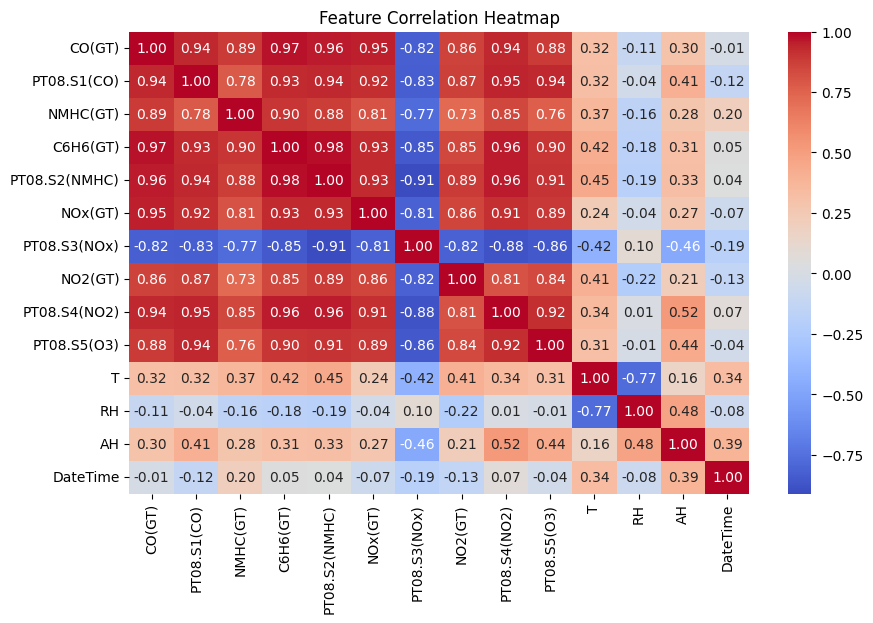

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

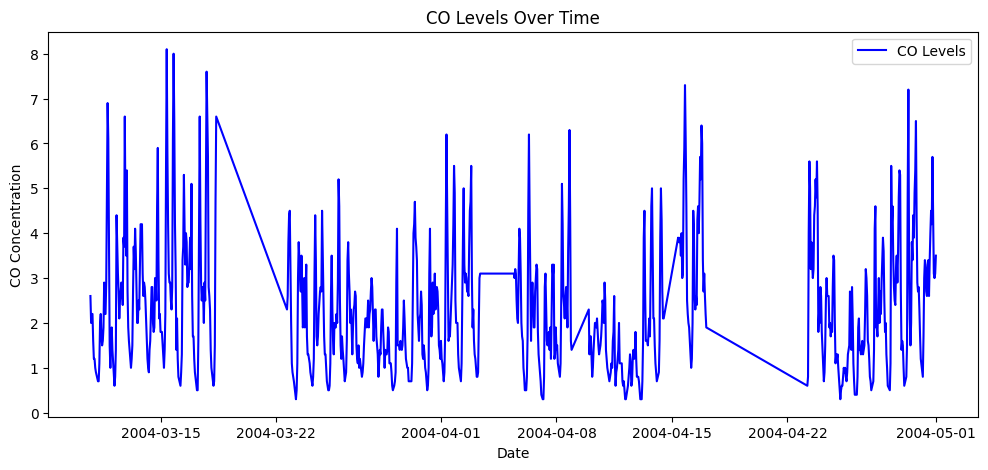

In [13]:
# Time-series visualization
plt.figure(figsize=(12, 5))
plt.plot(df['DateTime'], df['CO(GT)'], label='CO Levels', color='blue')
plt.xlabel('Date')
plt.ylabel('CO Concentration')
plt.title('CO Levels Over Time')
plt.legend()
plt.show()

In [17]:
# Save cleaned dataset
df.to_csv('Cleaned_AirQuality.csv', index=False)